# Test for Creating a Network over an Area

In [24]:
from shapely.geometry import Point, LineString, Polygon

import matplotlib.pyplot as plt

import geopandas as gpd

import numpy as np

from rtree import index

import networkx as nx

Creating the square

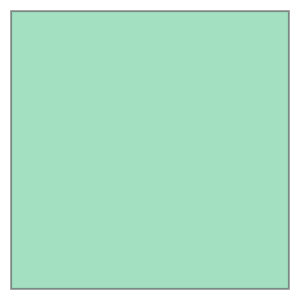

In [2]:
polygon = Polygon([(0,0),(0,1000),(1000,1000),(1000,0)])
polygon

Creating the points

In [3]:
count =  np.arange(0, 1025, 25, dtype=int)

In [4]:
points = []
for i in range(len(count)):
    point = count[i]
    for j in count:
        points.append(Point(point,j))
        points.append(Point(j,point))
nodes_gpd = gpd.GeoSeries(points)

In [5]:
#removing duplicates
G = nodes_gpd.geometry.apply(lambda geom: geom.wkb)
nodes_gpd =nodes_gpd.loc[G.drop_duplicates().index]

In [6]:
network_nodes = gpd.GeoDataFrame(geometry=nodes_gpd)
network_nodes['fid'] = range(1,len(network_nodes)+1)
network_nodes

,geometry,fid
0,POINT (0.000 0.000),1
2,POINT (0.000 25.000),2
3,POINT (25.000 0.000),3
4,POINT (0.000 50.000),4
5,POINT (50.000 0.000),5
...,...,...
3197,POINT (1000.000 950.000),1677
3276,POINT (975.000 975.000),1678
3278,POINT (975.000 1000.000),1679
3279,POINT (1000.000 975.000),1680


Checking in the right positions

In [5]:
# xs = [point.x for point in points]
# ys = [point.y for point in points]
# plt.scatter(xs, ys)
# x,y = polygon.exterior.xy
# plt.fill(x,y)
# plt.plot(xs, ys,'ro')
# plt.show

1
2
1
3
1
82


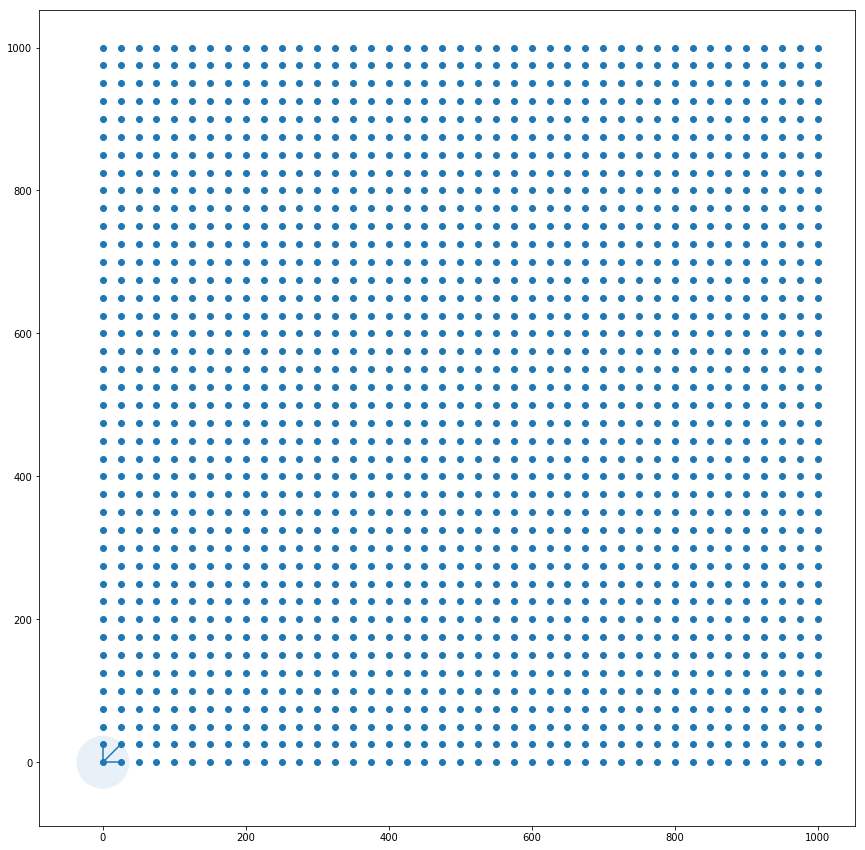

In [32]:
node_1 = network_nodes.iloc[0]
#node_1.fid
#node_1.geometry
#buffer = node_1.buffer(60) for grid
buffer = node_1.geometry.buffer(37)
buffer_gpd= gpd.GeoSeries(buffer)
# x,y = buffer.exterior.xy
# plt.fill(x,y)
# plt.plot(xs, ys,'ro')
# plt.show

links = []
start_node = []
end_node = []
intersection = network_nodes.intersection(buffer)
intersection = intersection[~intersection.is_empty]
#needs to be 1: to not do the node it start with
for i in intersection[1:]:
    print(node_1.fid)
    start_node.append(node_1.fid)
    end_point = network_nodes.loc[network_nodes['geometry']== i,'fid'].iloc[0]
    print(end_point)
    end_node.append(end_point)
    links.append(LineString([node_1.geometry,i]))
links_gpd = gpd.GeoSeries(links)
#links_gpd.plot()

fig, ax = plt.subplots(figsize=(15,15))
links_gpd.plot(ax=ax,zorder=3)
nodes_gpd.plot(ax=ax,zorder = 2)
buffer_gpd.plot(ax=ax,zorder=1,alpha=0.1)

Finished row 1
Finished row 2
Finished row 3
Finished row 4
Finished row 5
Finished row 6
Finished row 7
Finished row 8
Finished row 9
Finished row 10
Finished row 11
Finished row 12
Finished row 13
Finished row 14
Finished row 15
Finished row 16
Finished row 17
Finished row 18
Finished row 19
Finished row 20
Finished row 21
Finished row 22
Finished row 23
Finished row 24
Finished row 25
Finished row 26
Finished row 27
Finished row 28
Finished row 29
Finished row 30
Finished row 31
Finished row 32
Finished row 33
Finished row 34
Finished row 35
Finished row 36
Finished row 37
Finished row 38
Finished row 39
Finished row 40
Finished row 41
Finished row 42
Finished row 43
Finished row 44
Finished row 45
Finished row 46
Finished row 47
Finished row 48
Finished row 49
Finished row 50
Finished row 51
Finished row 52
Finished row 53
Finished row 54
Finished row 55
Finished row 56
Finished row 57
Finished row 58
Finished row 59
Finished row 60
Finished row 61
Finished row 62
Finished row 63
F

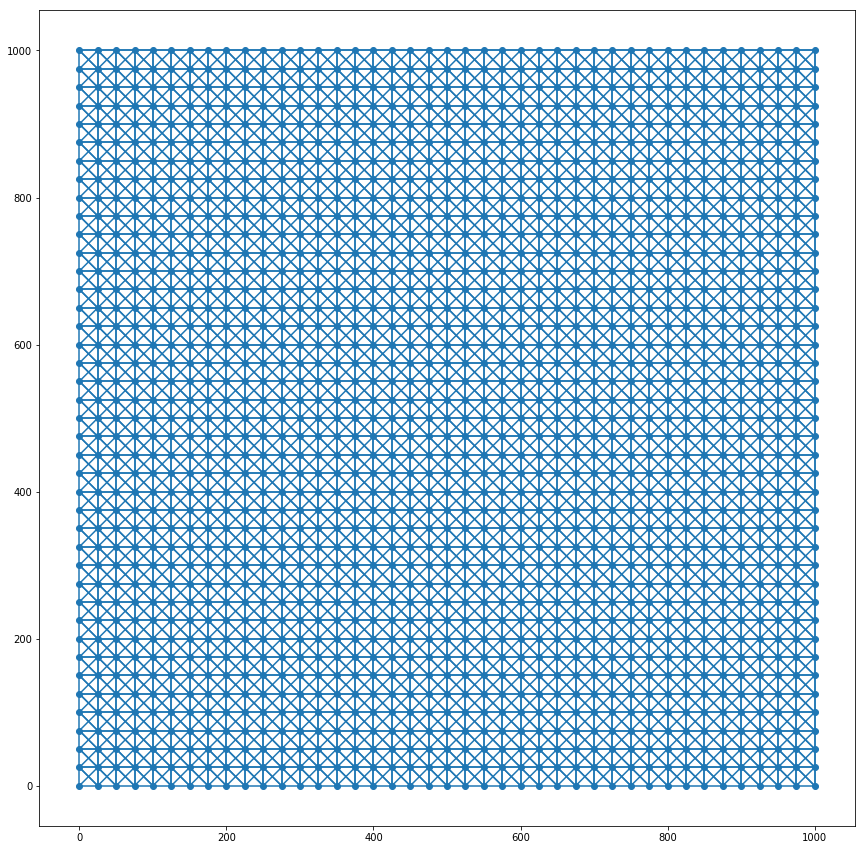

In [18]:
lines = []
start_node = []
end_node = []
for index,row in network_nodes.iterrows():
    buffer = row.geometry.buffer(37)
    intersection = network_nodes.intersection(buffer)
    intersection = intersection[~intersection.is_empty]
    for j in intersection[1:]:
        start_node.append(row.fid)
        end_point = network_nodes.loc[network_nodes['geometry']== j,'fid'].iloc[0]
        end_node.append(end_point)
        lines.append(LineString([row.geometry,j]))
    print('Finished row',row.fid)
links_gpd = gpd.GeoSeries(lines)

fig, ax = plt.subplots(figsize=(15,15))
links_gpd.plot(ax=ax,zorder=3)
nodes_gpd.plot(ax=ax,zorder = 2)
plt.savefig("grid.png",transparent=True)

In [20]:
links_fid = range(1,len(lines)+1)
network_links = gpd.GeoDataFrame({'fid':links_fid,'startNodes':start_node,'endNode':end_node,'geometry':lines})
#network_links = gpd.GeoDataFrame({'fid':links_fid,'startNodes':start_node,'geometry':lines})

network_links

,fid,startNodes,endNode,geometry
0,1,1,2,"LINESTRING (0.000 0.000, 0.000 25.000)"
1,2,1,3,"LINESTRING (0.000 0.000, 25.000 0.000)"
2,3,1,82,"LINESTRING (0.000 0.000, 25.000 25.000)"
3,4,2,2,"LINESTRING (0.000 25.000, 0.000 25.000)"
4,5,2,3,"LINESTRING (0.000 25.000, 25.000 0.000)"
...,...,...,...,...
12955,12956,1680,1680,"LINESTRING (1000.000 975.000, 1000.000 975.000)"
12956,12957,1680,1681,"LINESTRING (1000.000 975.000, 1000.000 1000.000)"
12957,12958,1681,1679,"LINESTRING (1000.000 1000.000, 975.000 1000.000)"
12958,12959,1681,1680,"LINESTRING (1000.000 1000.000, 1000.000 975.000)"


In [21]:
G = network_links['geometry'].apply(lambda geom: geom.wkb)
network_links=network_links.loc[G.drop_duplicates().index]

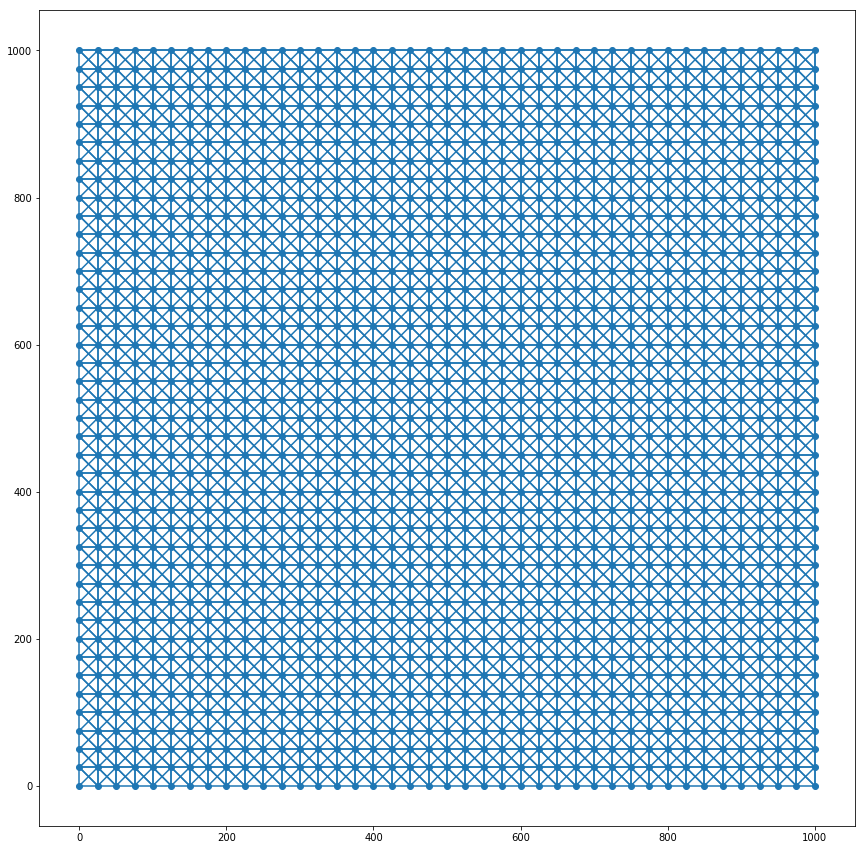

In [22]:
network_links.plot(ax=ax,zorder=3)
nodes_gpd.plot(ax=ax,zorder = 2)
plt.savefig("grid.png",transparent=True)

Creating the Network

In [28]:
graph = nx.Graph()
for index, row in network_links.iterrows():
    graph.add_edge(row['startNodes'], row['endNode'], fid=row['fid'])

In [30]:
path = nx.dijkstra_path(graph, source=3, target=8, weight="weight")
path

[3, 2, 4, 6, 8]

In [32]:
geom = []
links = []
first_node = path[0]
for node in path[1:]:
    link_fid = graph.edges[first_node, node]['fid']
    links.append(link_fid)
    row = network_links.loc[network_links['fid'] == link_fid]
    geom.append(row['geometry'].cascaded_union)
    first_node = node

path_gpd = gpd.GeoDataFrame({'fid': links, 'geometry': geom})
path_gpd

,fid,geometry
0,9,"LINESTRING (25.000 0.000, 0.000 25.000)"
1,6,"LINESTRING (0.000 25.000, 0.000 50.000)"
2,15,"LINESTRING (0.000 50.000, 0.000 75.000)"
3,25,"LINESTRING (0.000 75.000, 0.000 100.000)"
